<a href="https://www.kaggle.com/code/mohamedhassan1911/hand-gestures?scriptVersionId=113531364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Hand Gesture Recognition

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Image Processing</a></li>
<li><a href="#CNN">CNN modle</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects 

> Description of all features and the data itself is [here]()

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers.experimental.preprocessing as AugLayers
from tensorflow.keras import regularizers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
df_train = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
df_test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [37]:
# import os
# current_directory = os.getcwd()

# df_train = pd.read_csv(current_directory + '\DataSource' + '\sign_mnist_train.csv')
# df_test = pd.read_csv(current_directory + '\DataSource' + '\sign_mnist_test.csv')
# df_train.head(2)

> Kepping only 4 gestures.

In [3]:
indices = [0, 1, 2, 14, 21]
df = df_train.query(f'label in {indices}')
lab = {indices[i]:i for i in range(len(indices))}
df['label'] = df.label.apply(lambda x: lab[x])

df = df.reset_index(drop=True)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
1,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
2,4,131,135,139,143,145,146,149,152,153,...,174,192,191,191,191,191,193,191,190,191
3,1,146,149,150,150,151,152,152,153,153,...,196,197,197,196,196,195,194,194,190,187
4,1,134,136,139,140,142,144,146,146,146,...,168,162,164,161,164,174,168,157,149,141


> taking 20% of train dataset for validation

In [39]:
# # First shuffling the train dataset
# df_train = df_train.sample(frac = 1).reset_index(drop=True)

# validation_untill = int(0.2 * df_train.shape[0])
# df_validation     = df_train.iloc[:validation_untill, :]
# df_train          = df_train.iloc[validation_untill:, :]

# print(f'Shape of validation is   : {df_validation.shape}\nShape of train dataset is: {df_train.shape}')

In [40]:
# print(f'Shape of Train dataSet is: {df_train.shape}')
# print(f'Shape of test  dataSet is: {df_test.shape}')

In [41]:
# # Resetting indecies to 0, 1, 2 ...
# df_train = df_train.reset_index(drop=True)
# df_train.head()

<a id='eda'></a>
## Exploratory Data Analysis

> Making reialable labels, Comes form the original dataSet

In [4]:
import string
Alphabet_labels = list(string.ascii_letters)

> Converting images into shape of w x h

In [43]:
# # Frist for train images
# imgWidth = int(np.sqrt(len(df_train.columns) - 1))


# X_train = df_train.loc[:, 'pixel1':] / 255
# print(f'Shape befor resizing: {X_train.shape}')
# X_train = X_train.values.reshape(-1, imgWidth, imgWidth)
# print(f'Shape after resizing: {X_train.shape}')

In [5]:
# Frist for train images
imgWidth = int(np.sqrt(len(df.columns) - 1))


X_train = df.loc[:, 'pixel1':] / 255
print(f'Shape befor resizing: {X_train.shape}')
X_train = X_train.values.reshape(-1, imgWidth, imgWidth)
print(f'Shape after resizing: {X_train.shape}')

Shape befor resizing: (5558, 784)
Shape after resizing: (5558, 28, 28)


In [45]:
# Y_train = df_train.loc[:, 'label']

In [6]:
Y_train = df.loc[:, 'label']

In [ ]:
# # Second for validation images
# imgWidth = int(np.sqrt(len(df_validation.columns) - 1))

# X_val = df_validation.loc[:, 'pixel1':] / 255
# print(f'Shape befor resizing: {X_val.shape}')
# X_val = X_val.values.reshape(-1, imgWidth, imgWidth)
# print(f'Shape after resizing: {X_val.shape}')

In [10]:
np.unique(Y_train)

array([0, 1, 2, 3, 4])

In [21]:
index = np.where(Y_train == 1)[0][0]
index

3

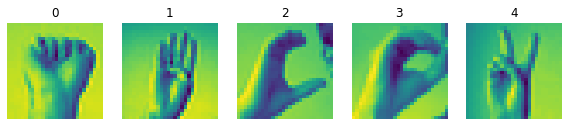

In [18]:
figure = plt.figure(figsize=(12, 12))
for i in range(len(indices)):
    index = np.where(Y_train == i)[0][0]
    ax = plt.subplot(4, 6, i + 1)
    plt.imshow(X_train[index])
    plt.title(i)
    plt.axis('off')

In [ ]:
# df_train = df_validation = []
# del df_train
# del df_validation

> Resizing images to be 32 x 32 x 3 as the minimum values for MobileNet2

In [23]:
temp_train = []
temp_val   = []
print(f'Shape befor resizing: {X_train[0].shape}')

for i in range(len(X_train)):
    gray_resized_img = cv2.resize(X_train[i], (32, 32))                                       # Resizing it to be 32 x 32.
    img_with_3Channels = cv2.merge((gray_resized_img, gray_resized_img, gray_resized_img))    # Converting it to RGB image.
    temp_train.append(img_with_3Channels)
    
# for i in range(len(X_val)):
#     gray_resized_img = cv2.resize(X_val[i], (32, 32))                                         # Resizing it to be 32 x 32.
#     img_with_3Channels = cv2.merge((gray_resized_img, gray_resized_img, gray_resized_img))    # Converting it to RGB image.
#     temp_val.append(img_with_3Channels)
    
    
X_train = np.array(temp_train)
X_val   = np.array(temp_val)

print(f'New shape is: {X_train[0].shape}')

Shape befor resizing: (28, 28)
New shape is: (32, 32, 3)


> After running the model, found that there is an Overfitting. As out data is small. So, let't increase them.

### Data Augmentation

In [26]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    rotation_range=10,
    validation_split=0.2
)

# Augmented_Images = []
# Labels_of_augmented_iamges = []

# for i in range(len(X_train)):
#     augmented = datagen.flow(np.expand_dims(X_train[i], 0))
#     for j in range(3): # Making 3 augmented images for each image in training dataset.
#         img = next(iter(augmented))
#         Augmented_Images.append(img)
#         Labels_of_augmented_iamges.append(Y_train[i])

# print(f'X_train befor augmantation has the shape of: {X_train.shape}')
# X_train = np.concatenate((X_train, np.array(Augmented_Images).squeeze()))
# Y_train = np.concatenate((Y_train, np.array(Labels_of_augmented_iamges)))
# print(f'New shape is: {X_train.shape}')

In [ ]:
# Augmented_Images = []
# Labels_of_augmented_iamges = []

# for i in range(len(X_val)):
#     augmented = datagen.flow(np.expand_dims(X_val[i], 0))
#     for j in range(3): # Making 3 augmented images for each image in training dataset.
#         img = next(iter(augmented))
#         Augmented_Images.append(img)
#         Labels_of_augmented_iamges.append(Y_val[i])

# print(f'X_val befor augmantation has the shape of: {X_val.shape}')
# X_val = np.concatenate((X_val, np.array(Augmented_Images).squeeze()))
# Y_val= np.concatenate((Y_val, np.array(Labels_of_augmented_iamges)))
# print(f'New shape is: {X_val.shape}')

> Now lets plot some augmented images

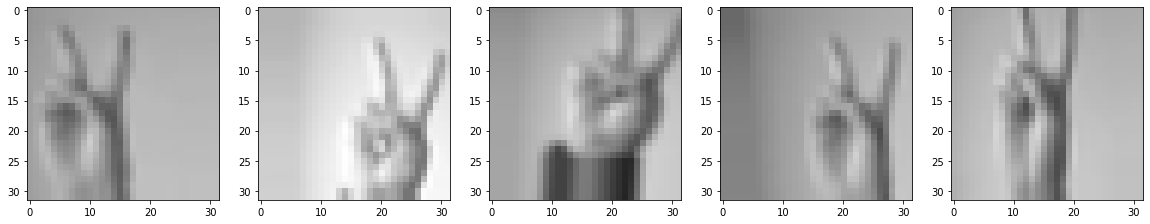

In [27]:
img = X_train[np.where(Y_train==4)]
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
ax = ax.ravel()

for i in range(5):
    im = next(datagen.flow(img[i].reshape((1,32, 32, 3))))[0]
    ax[i].imshow(im)

In [ ]:
# figure = plt.figure(figsize=(15, 15))
# for i in range(6):
#     ax = plt.subplot(1, 6, i + 1)
#     plt.imshow(Augmented_Images[i+15][0,:,:,:])
#     plt.title(Alphabet_labels[Labels_of_augmented_iamges[i+15]])
#     plt.axis('off')

<a id='CNN'></a>
## CNN Model

In [28]:
process_input =  tf.keras.applications.mobilenet_v2.preprocess_input

> Making Callbacks, first with the checkpoints for best validation_set model.

In [30]:
checkpoint_path = "checkpoints/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 monitor='val_accuracy',
                                                 save_best_only=True,
                                                 mode='max',
                                                 verbose=1)

> Learning Rate decay

In [31]:
def scheduler(epoch, lr):
    if epoch < 2:
        return lr
    else:
        return lr * 0.99

    
lr_Scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

> Early stopping, to stop training if validation accuracy didn't improve for 3 epoches

In [32]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [33]:
def model(input_size = (32, 32)):
    imgSize = input_size + (3, )
    
    base_model = tf.keras.applications.MobileNetV2(
        input_shape = imgSize,
        include_top = False,
        weights     = 'imagenet')
    
    base_model.trainable = False
    
    
    inputs = tfl.Input(shape = imgSize)
    x      = process_input(inputs)
    
    x      = base_model(inputs, training = False)
    x      = tfl.GlobalAveragePooling2D()(x)
    
    x      = tfl.Dense(125, activation = 'relu')(x)
#     x      = tfl.Dropout(0.2)(x) 
    
    Outputs      = tfl.Dense(26, activation="softmax")(x)
    
    modle = tf.keras.Model(inputs, Outputs)

    return modle

In [35]:
Model = model()

In [36]:
# Unfreezing some layers
base_model = Model.layers[1]
base_model.trainable = True

freezing = len(base_model.layers) - 3
for layer in base_model.layers[:freezing]:
    layer.trainable = False

In [37]:
Model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 125)               160125    
_________________________________________________________________
dense_3 (Dense)              (None, 26)                3276      
Total params: 2,421,385
Trainable params: 575,561
Non-trainable params: 1,845,824
_________________________________________________________________


In [38]:
Model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [39]:
training = datagen.flow(X_train, Y_train, batch_size=32, shuffle=True, seed=123, subset='training')
validation = datagen.flow(X_train, Y_train, batch_size=32, shuffle=True, seed=123, subset='training')

In [40]:
history = Model.fit(training, validation_data=validation, epochs=10, batch_size = 32, verbose=1, callbacks=[cp_callback, early_stop])

2022-12-11 13:59:58.074667: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-12-11 14:00:01.628131: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


139/139 [==============================] - 21s 78ms/step - loss: 0.6872 - accuracy: 0.7616 - val_loss: 0.3020 - val_accuracy: 0.8871

Epoch 00001: val_accuracy improved from -inf to 0.88711, saving model to checkpoints/


2022-12-11 14:00:27.857741: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
139/139 [==============================] - 10s 72ms/step - loss: 0.2723 - accuracy: 0.8981 - val_loss: 0.2622 - val_accuracy: 0.9002

Epoch 00002: val_accuracy improved from 0.88711 to 0.90016, saving model to checkpoints/


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10
139/139 [==============================] - 10s 69ms/step - loss: 0.2440 - accuracy: 0.9125 - val_loss: 0.2323 - val_accuracy: 0.9190

Epoch 00003: val_accuracy improved from 0.90016 to 0.91905, saving model to checkpoints/


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/10
139/139 [==============================] - 10s 75ms/step - loss: 0.2086 - accuracy: 0.9258 - val_loss: 0.1826 - val_accuracy: 0.9379

Epoch 00004: val_accuracy improved from 0.91905 to 0.93794, saving model to checkpoints/


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
139/139 [==============================] - 10s 74ms/step - loss: 0.2107 - accuracy: 0.9262 - val_loss: 0.2010 - val_accuracy: 0.9323

Epoch 00005: val_accuracy did not improve from 0.93794
Epoch 6/10
139/139 [==============================] - 10s 74ms/step - loss: 0.1980 - accuracy: 0.9301 - val_loss: 0.2190 - val_accuracy: 0.9197

Epoch 00006: val_accuracy did not improve from 0.93794
Epoch 7/10
139/139 [==============================] - 10s 71ms/step - loss: 0.1501 - accuracy: 0.9454 - val_loss: 0.1399 - val_accuracy: 0.9510

Epoch 00007: val_accuracy improved from 0.93794 to 0.95098, saving model to checkpoints/


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/10
139/139 [==============================] - 10s 71ms/step - loss: 0.1495 - accuracy: 0.9476 - val_loss: 0.2389 - val_accuracy: 0.9244

Epoch 00008: val_accuracy did not improve from 0.95098
Epoch 9/10
139/139 [==============================] - 10s 71ms/step - loss: 0.1553 - accuracy: 0.9449 - val_loss: 0.1349 - val_accuracy: 0.9476

Epoch 00009: val_accuracy did not improve from 0.95098
Epoch 10/10
139/139 [==============================] - 10s 73ms/step - loss: 0.1757 - accuracy: 0.9359 - val_loss: 0.1293 - val_accuracy: 0.9528

Epoch 00010: val_accuracy improved from 0.95098 to 0.95278, saving model to checkpoints/


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


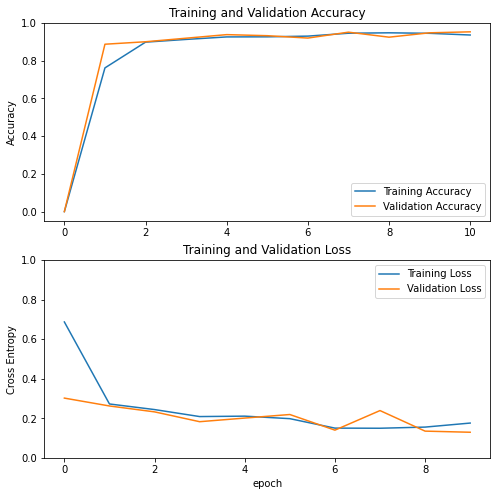

In [41]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
np.unique(Y_train)

In [ ]:
# del df_train
# del df_validation
# del X_train
# del Y_train
# del X_val
# del Y_val

In [ ]:
Model.save('SwhiMee2.h5')

In [ ]:
results = Model.predict(X_train)

In [ ]:
i = 2
print(f'Predicted_value: {Alphabet_labels[np.argmax(results[i])]}\nThe actual value: {Alphabet_labels[Y_tarin[i]]}')

In [43]:
!ls checkpoints

assets	keras_metadata.pb  saved_model.pb  variables


<a id='conclusions'></a>
## Conclusions